In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scanpy as sc
from scipy.sparse import csr_matrix
import anndata

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=60, frameon=False, figsize=(6,3), facecolor='white')

In [3]:
adata = sc.read('0 hum.txt')

In [5]:
adata = adata.transpose()

In [6]:
adata

AnnData object with n_obs × n_vars = 25296 × 31544

In [7]:
adata.obs['Specimen'] = adata.obs.index.to_series().str.split('_',expand=True)[0]
adata.obs['Population'] = adata.obs.index.to_series().str.split('_',expand=True)[1]
adata.obs['source'] = adata.obs['Specimen'].astype(str) + '_' + adata.obs['Population'].astype(str)

In [8]:
adata.obs

,Specimen,Population,source
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzTCATGTCATACC,F70,CR,F70_CR
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCAACCTCCGCAT,F70,CR,F70_CR
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzATTATTAAACAT,F70,CR,F70_CR
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzAGTCAACTCGGN,F70,CR,F70_CR
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCCCGCCCGCCAT,F70,CR,F70_CR
...,...,...,...
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzCACGAACTTCTT,F54,DN,F54_DN
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzGCGGGAAGGTTT,F54,DN,F54_DN
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzGTTTTTGCTTTA,F54,DN,F54_DN
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTGCCACAACGAC,F54,DN,F54_DN


(array([6.027e+03, 6.494e+03, 2.876e+03, 1.708e+03, 1.274e+03, 9.680e+02,
        7.280e+02, 5.880e+02, 4.920e+02, 3.830e+02, 3.340e+02, 2.880e+02,
        2.410e+02, 2.150e+02, 1.690e+02, 1.680e+02, 1.290e+02, 1.210e+02,
        9.900e+01, 1.180e+02, 9.300e+01, 8.600e+01, 8.600e+01, 8.400e+01,
        7.400e+01, 8.100e+01, 7.400e+01, 7.800e+01, 6.700e+01, 6.600e+01,
        7.100e+01, 5.600e+01, 7.400e+01, 6.100e+01, 5.900e+01, 6.500e+01,
        5.200e+01, 4.400e+01, 4.800e+01, 5.100e+01, 4.300e+01, 4.300e+01,
        3.500e+01, 3.100e+01, 3.000e+01, 2.400e+01, 2.600e+01, 2.800e+01,
        2.800e+01, 1.700e+01, 2.000e+01, 1.800e+01, 2.000e+01, 1.600e+01,
        1.200e+01, 1.200e+01, 8.000e+00, 1.100e+01, 6.000e+00, 9.000e+00,
        6.000e+00, 6.000e+00, 5.000e+00, 7.000e+00, 5.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 6.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+0

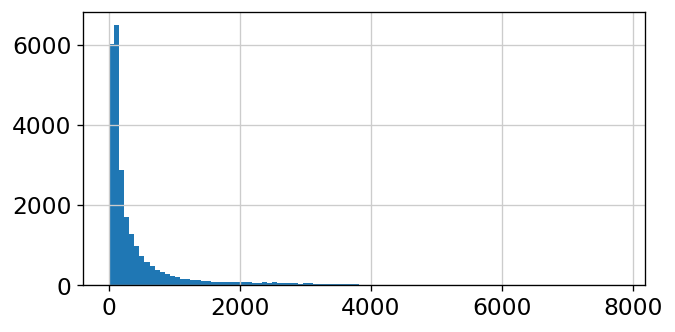

In [9]:
# number of genes expressed in each cell
plt.hist(np.sort(np.sum(adata.X > 0, axis = 1)), bins=100)

(array([2.128e+04, 1.891e+03, 1.370e+03, 1.076e+03, 8.280e+02, 6.580e+02,
        5.430e+02, 4.890e+02, 4.200e+02, 3.220e+02, 2.820e+02, 2.880e+02,
        2.120e+02, 2.100e+02, 1.750e+02, 1.460e+02, 1.430e+02, 1.080e+02,
        1.110e+02, 9.500e+01, 6.100e+01, 7.500e+01, 5.000e+01, 5.200e+01,
        5.700e+01, 5.300e+01, 4.200e+01, 3.400e+01, 3.600e+01, 2.900e+01,
        2.300e+01, 2.300e+01, 1.600e+01, 2.800e+01, 2.100e+01, 1.400e+01,
        1.500e+01, 1.400e+01, 1.200e+01, 1.300e+01, 1.500e+01, 8.000e+00,
        9.000e+00, 4.000e+00, 3.000e+00, 7.000e+00, 4.000e+00, 1.000e+01,
        8.000e+00, 5.000e+00, 7.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
        4.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 6.000e+00,
        5.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 6.000e+00,
        4.000e+00, 1.000e+00, 6.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        6.000e+00, 8.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 4.000e+0

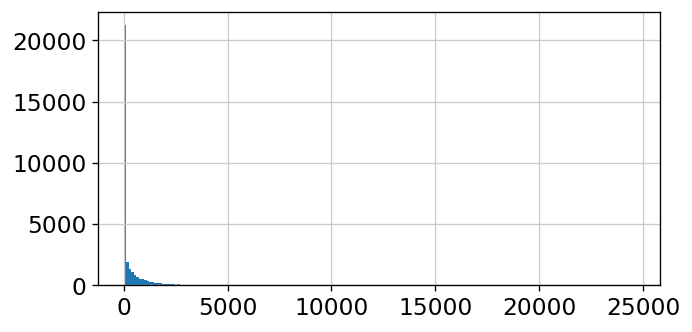

In [10]:
# number of cell each gene is expressed in
plt.hist(np.sort(np.sum(adata.X > 0, axis = 0)),bins=200)

normalizing counts per cell
    finished (0:00:09)


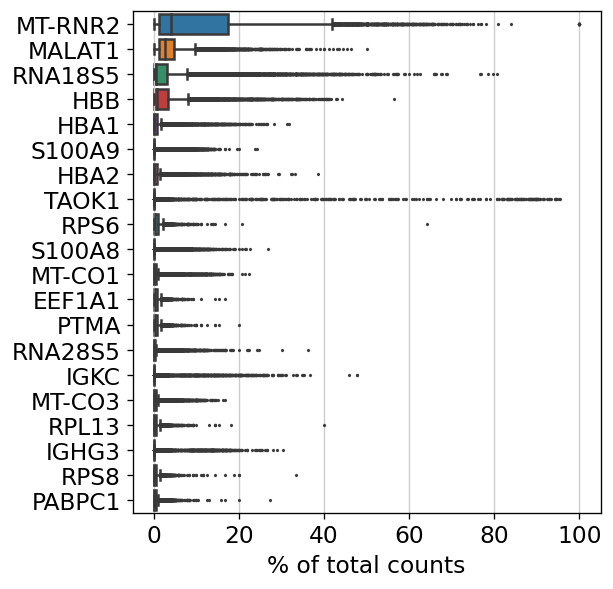

In [11]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [12]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 14337 cells that have less than 200 genes expressed
filtered out 7164 genes that are detected in less than 3 cells


In [13]:
adata

AnnData object with n_obs × n_vars = 10959 × 24380
    obs: 'Specimen', 'Population', 'source', 'n_genes'
    var: 'n_cells'

In [14]:
adata.obs

,Specimen,Population,source,n_genes
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzTCATGTCATACC,F70,CR,F70_CR,4891
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCAACCTCCGCAT,F70,CR,F70_CR,5138
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzATTATTAAACAT,F70,CR,F70_CR,3344
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzAGTCAACTCGGN,F70,CR,F70_CR,2303
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCCCGCCCGCCAT,F70,CR,F70_CR,1753
...,...,...,...,...
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzAGATAAAGCCTT,F54,DN,F54_DN,246
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTCCTATTCAGTG,F54,DN,F54_DN,292
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTTCGACTGCAGC,F54,DN,F54_DN,359
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzGCAGCAGTTTAA,F54,DN,F54_DN,683


In [15]:
adata.var

,n_cells
A1BG,6
A1BG-AS1,26
A1CF,7
A2M,72
A2M-AS1,23
...,...
hsa-mir-5195,49
hsa-mir-6080,99
hsa-mir-7515,12
hsa-mir-8072,122


In [16]:
# sparsity
1 - np.count_nonzero(adata.X)/np.size(adata.X)

0.9627524801405731

In [17]:
adata.X = csr_matrix(adata.X)

In [18]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [19]:
adata.obs # total_counts == nUMI

,Specimen,Population,source,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzTCATGTCATACC,F70,CR,F70_CR,4891,4873,19555.0,1267.0,6.479161
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCAACCTCCGCAT,F70,CR,F70_CR,5138,5115,20861.0,1447.0,6.936388
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzATTATTAAACAT,F70,CR,F70_CR,3344,3326,10172.0,690.0,6.783327
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzAGTCAACTCGGN,F70,CR,F70_CR,2303,2296,9153.0,592.0,6.467824
F70_CR_PCR1.altered_out_gene_exon_tagged.dge.txt.gzCCCGCCCGCCAT,F70,CR,F70_CR,1753,1745,6755.0,492.0,7.283494
...,...,...,...,...,...,...,...,...
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzAGATAAAGCCTT,F54,DN,F54_DN,246,246,320.0,15.0,4.687500
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTCCTATTCAGTG,F54,DN,F54_DN,292,291,427.0,8.0,1.873536
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzTTCGACTGCAGC,F54,DN,F54_DN,359,359,514.0,14.0,2.723735
F54_DN_PCR10-17.altered_out_gene_exon_tagged.dge.txt.gzGCAGCAGTTTAA,F54,DN,F54_DN,683,683,1771.0,32.0,1.806889


/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Specimen' as categorical
/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Population' as categorical
/home/lh3n19/.conda/envs/my/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a futu

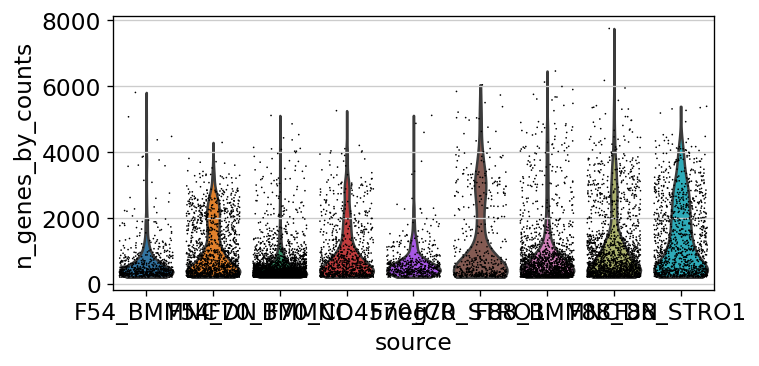

In [20]:
sc.pl.violin(adata, ['n_genes_by_counts'], groupby='source',jitter=0.4,multi_panel=True)

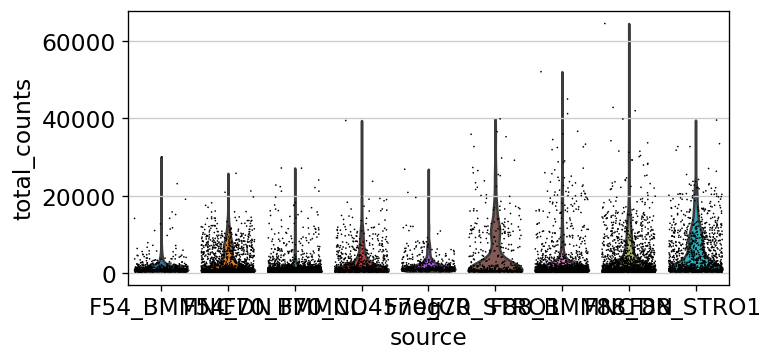

In [21]:
sc.pl.violin(adata, ['total_counts'], groupby='source',jitter=0.4,multi_panel=True)

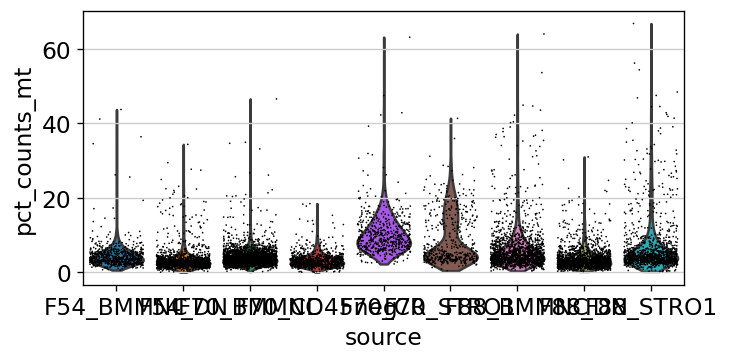

In [22]:
sc.pl.violin(adata, ['pct_counts_mt'], groupby='source',jitter=0.4, multi_panel=True)

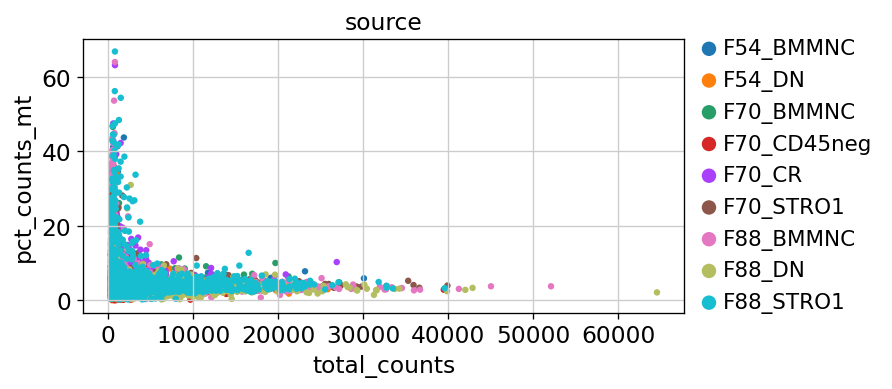

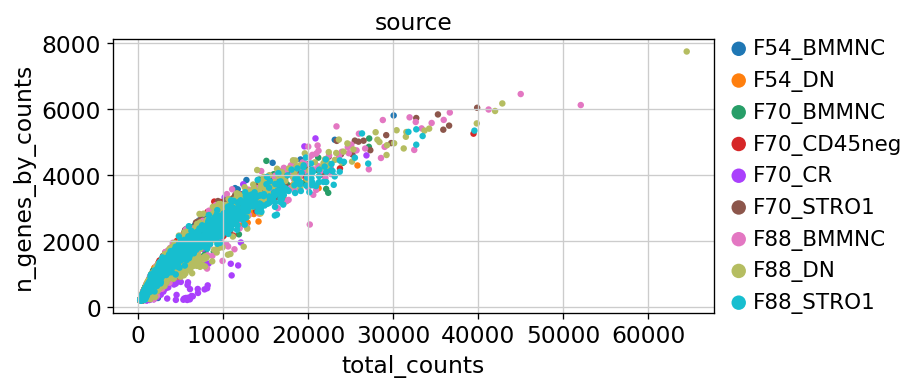

In [23]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='source',size=60)
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='source',size=60)

In [24]:
adata = adata[adata.obs.pct_counts_mt < 8, :]
adata = adata[adata.obs.total_counts < 4e4, :]
adata = adata[adata.obs.total_counts > 200, :]

In [25]:
adata#(9546, 24380)

View of AnnData object with n_obs × n_vars = 9542 × 24380
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'source_colors'

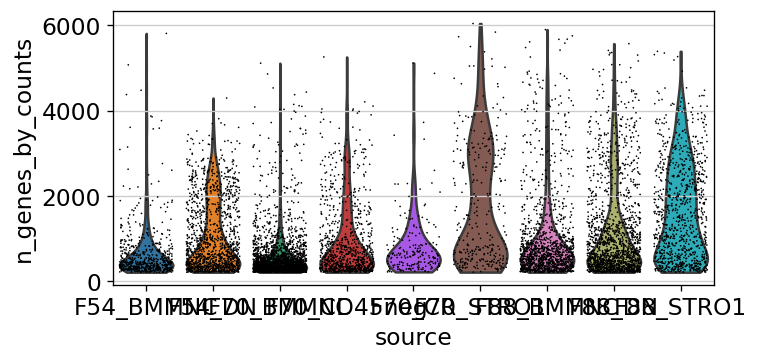

In [26]:
sc.pl.violin(adata, ['n_genes_by_counts'], groupby='source',jitter=0.4,multi_panel=True)

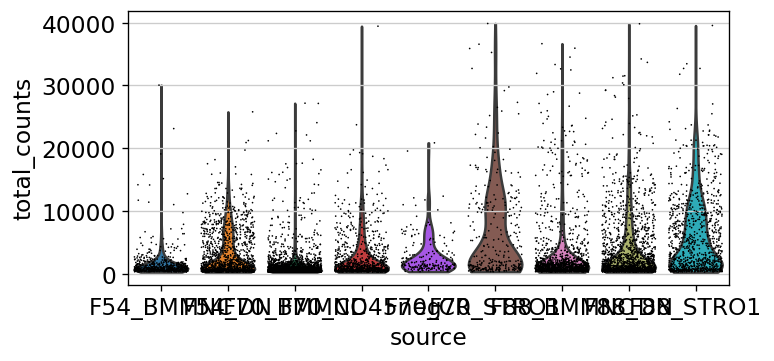

In [27]:
sc.pl.violin(adata, ['total_counts'], groupby='source',jitter=0.4,multi_panel=True)

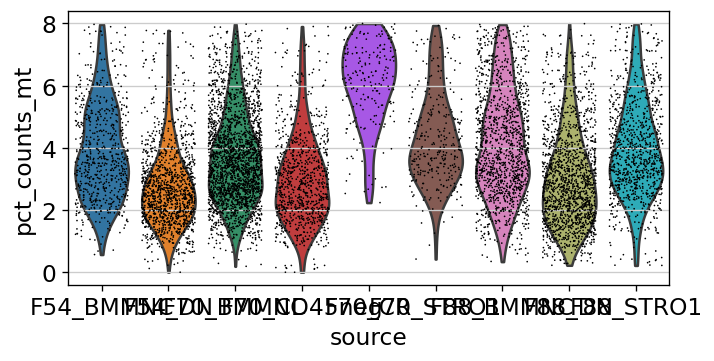

In [28]:
sc.pl.violin(adata, ['pct_counts_mt'], groupby='source',jitter=0.4, multi_panel=True)

In [29]:
adata = adata[:,~adata.var['mt']]

In [30]:
adata

View of AnnData object with n_obs × n_vars = 9542 × 24343
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'source_colors'

In [31]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 125 cells that have less than 200 genes expressed


Trying to set attribute `.obs` of view, copying.


filtered out 629 genes that are detected in less than 3 cells


In [32]:
adata

AnnData object with n_obs × n_vars = 9417 × 23714
    obs: 'Specimen', 'Population', 'source', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'source_colors'

In [33]:
adata.write_h5ad('2 filtered_hum_0829.h5ad')

In [34]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [35]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


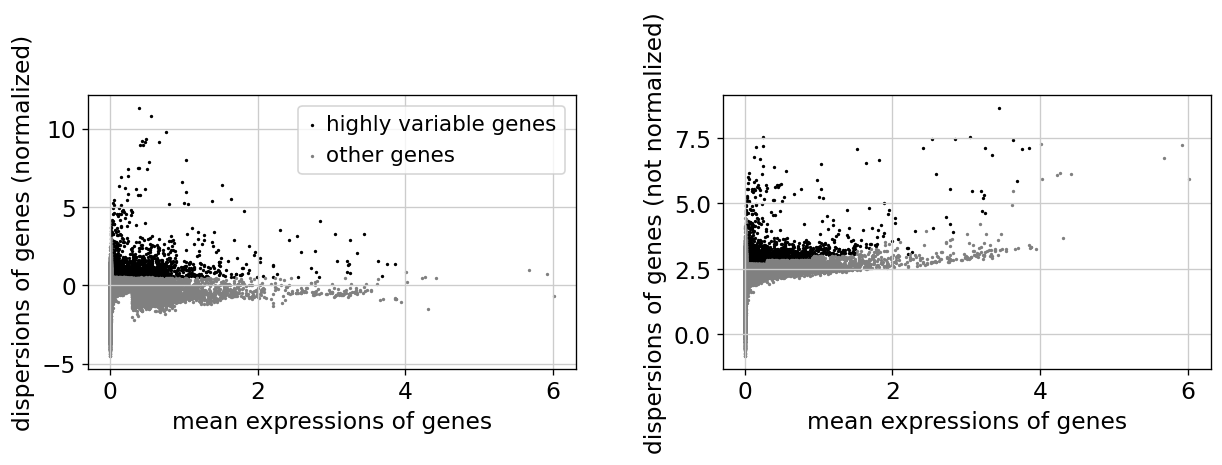

In [36]:
sc.pl.highly_variable_genes(adata)

In [37]:
sc.pp.regress_out(adata, ['total_counts'], n_jobs = 16)
sc.pp.scale(adata)

regressing out ['total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:03:47)


In [38]:
adata.write_h5ad('2 filtered_normalised_scaled_centered_hum_0829.h5ad')

In [2]:
# No centering
adata = anndata.read_h5ad('2 filtered_hum_0829.h5ad')
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=4, min_disp=0.5)
sc.pp.regress_out(adata, 'total_counts', n_jobs=16)

for i in range(adata.X.shape[1]):
    t=np.min(adata.X[:,i])
    if t<0:
        adata.X[:,i] -= t

sc.pp.scale(adata, zero_center = False)

adata.write_h5ad('2 filtered_normalised_scaled_hum_00901.h5ad')

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out total_counts
    sparse input is densified and may lead to high memory use
    finished (0:04:00)
